In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [21]:
(X_train, Y_train), (X_test, Y_test)=tf.keras.datasets.cifar10.load_data()
X_train=X_train/255.0
X_test=X_test/255.0
Y_train=to_categorical(Y_train, 10)
Y_test=to_categorical(Y_test, 10)

In [22]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))
base_model.trainable=False

In [18]:
model=models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)
loss, accuracy= model.evaluate(X_test, Y_test)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 551s 876ms/step - accuracy: 0.4440 - loss: 1.5843 - val_accuracy: 0.5605 - val_loss: 1.2557
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 571s 892ms/step - accuracy: 0.5845 - loss: 1.2032 - val_accuracy: 0.5766 - val_loss: 1.2113
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 548s 870ms/step - accuracy: 0.5979 - loss: 1.1459 - val_accuracy: 0.5876 - val_loss: 1.1823
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 558s 864ms/step - accuracy: 0.6137 - loss: 1.0965 - val_accuracy: 0.5985 - val_loss: 1.1553
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 559s 859ms/step - accuracy: 0.6291 - loss: 1.0569 - val_accuracy: 0.6079 - val_loss: 1.1375
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 563s 861ms/step - accuracy: 0.6471 - loss: 1.0095 - val_accuracy: 0.6073 - val_loss: 1.1302
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 598s 918ms/step - accuracy: 0.6574 - loss: 0.9757 - val_accuracy: 0.6069 - val_loss: 1.1421
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 585s 859ms/step - accuracy: 0.6682 -

In [23]:
Y_pred=np.argmax(model.predict(X_test), axis=1)
Y_true=np.argmax(Y_test, axis=1)
print(f"Test Accuracy: {accuracy_score(Y_true,Y_pred)}")
test_img=X_test[0:1]
layer_outputs=[layer.output for layer in base_model.layers[:4]]
activation_model=models.Model(inputs=base_model.input, outputs=layer_outputs)
activations=activation_model.predict(test_img)
first_layer_activation=activations[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 389ms/step
Test Accuracy: 0.6139
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


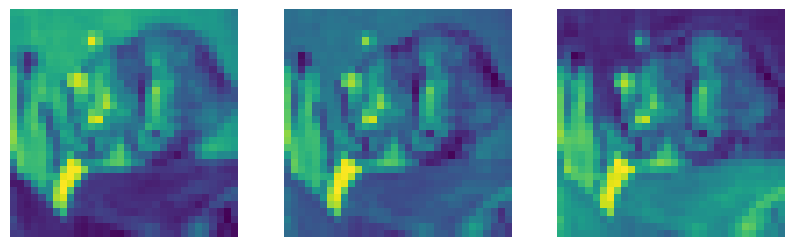

In [34]:
plt.figure(figsize=(10,10))
for i in range(first_layer_activation.shape[3]):
    plt.subplot(1, first_layer_activation.shape[3], i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()